In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
### a). import data and separate the predictors and output vector -----------------------------------------------------

from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]

#print(data1.shape)
#print(X.shape)
print(np.unique(y))


[1. 2. 3.]


Number of classes we have in the given data is 3.

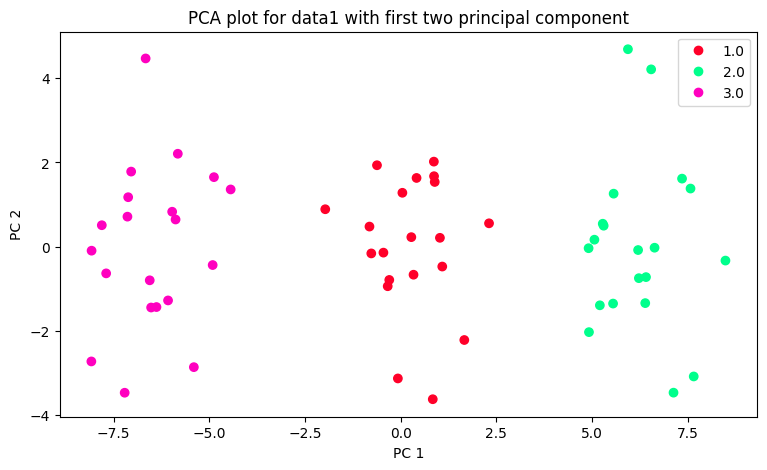

In [6]:
### b). Performing PCA on the 60 observations and first two principle component score vectors plot ---------------------------------

from sklearn.decomposition import PCA

### PCA analysis ---------------------------------------------------------------------------------------------
pca = PCA(n_components=2)
#pca = PCA()
pc = pca.fit_transform(X)
#print(pc)

### plot ---------------------------------------------------------------------------------------------------------

plt.figure(figsize = (9,5))
plot = plt.scatter(pc[:,0], pc[:,1], c = y, cmap = 'gist_rainbow')
plt.legend(handles=plot.legend_elements()[0], labels=list(y))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA plot for data1 with first two principal component')
plt.show()


[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1
 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]


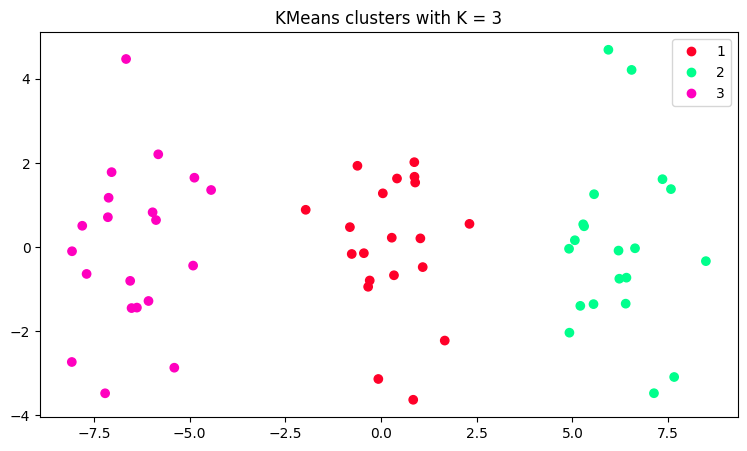

[1 1 2 2 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1
 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2 1 1 2]


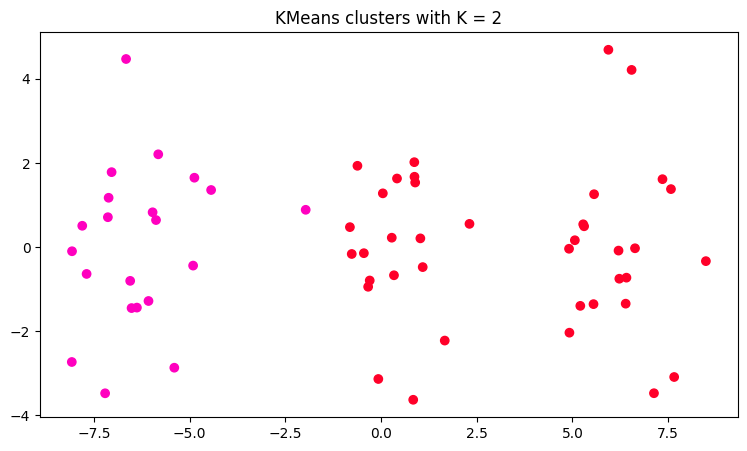

[3 4 1 3 4 1 2 4 1 3 4 1 3 4 1 2 4 1 3 4 1 3 4 1 3 4 1 2 4 1 3 4 1 3 4 1 3
 4 1 3 4 1 3 4 1 2 4 1 3 4 1 2 4 1 3 4 1 3 4 1]


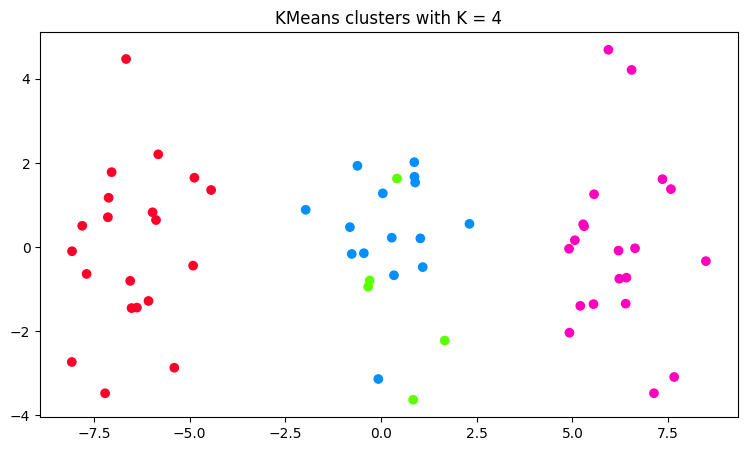

In [7]:
### c, d). Performing K-means clustering of the observations with K = 3, 2 and 4 -------------------------------------------

from sklearn.cluster import KMeans

#--------------------- For K = 3 ---------------------------------------------------------------------------

kmeans_3 = KMeans(n_clusters=3) 

KM3 = kmeans_3.fit(X)
output_3 = KM3.predict(X)

for index, i in enumerate(output_3):
    if i == 0:
        output_3[index] = 1
    elif i == 1:
        output_3[index] = 2
    elif i == 2:
        output_3[index] = 3
        
print(output_3)
plt.figure(figsize = (9,5))
plot = plt.scatter(pc[:,0], pc[:,1], c = output_3, cmap = 'gist_rainbow')
plt.legend(handles=plot.legend_elements()[0], labels=list(output_3))
plt.title('KMeans clusters with K = 3')
plt.show()

#--------------------- For K = 2 ---------------------------------------------------------------------------

kmeans_2 = KMeans(n_clusters=2) 
KM2 = kmeans_2.fit(X)
output_2 = kmeans_2.predict(X)


for index, i in enumerate(output_2):
    if i == 0:
        output_2[index] = 1
    elif i == 1:
        output_2[index] = 2
    elif i == 2:
        output_2[index] = 3
        
print(output_2)
plt.figure(figsize = (9,5))
plot = plt.scatter(pc[:,0], pc[:,1], c = output_2, cmap = 'gist_rainbow')
plt.title('KMeans clusters with K = 2')
plt.show()

#--------------------- For K = 4 ---------------------------------------------------------------------------

kmeans_4 = KMeans(n_clusters=4)
KM4 = kmeans_4.fit(X)
output_4 = kmeans_4.predict(X)

for index, i in enumerate(output_4):
    if i == 0:
        output_4[index] = 1
    elif i == 1:
        output_4[index] = 2
    elif i == 2:
        output_4[index] = 3
    else:
        output_4[index] = 4
        
print(output_4)
plt.figure(figsize = (9,5))
plot = plt.scatter(pc[:,0], pc[:,1], c = output_4, cmap = 'gist_rainbow')
plt.title('KMeans clusters with K = 4')
plt.show()


Clusters for K = 3, are same as for PCA scenario. Hence, clusters obtained for K = 3 are best. 
For K=2 and K =4, cluster formation is not perfect.

[2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2
 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1]


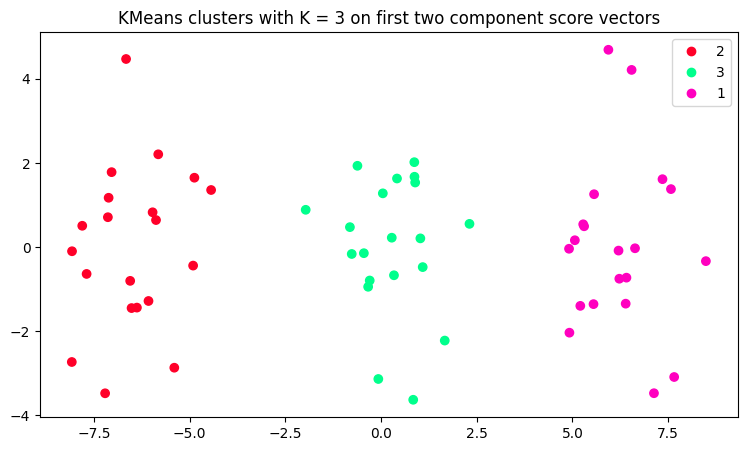

In [8]:
### e). Now perform K-means clustering with K = 3, on the first two principal component score vectors -----------------------------

kmeans_pca = KMeans(n_clusters=3) 

KM_pca = kmeans_pca.fit(pc)
output_pca = KM_pca.predict(pc)
#print(output_pca)
#print(y)

for index, i in enumerate(output_pca):
    if i == 0:
        output_pca[index] = 1
    elif i == 1:
        output_pca[index] = 2
    elif i == 2:
        output_pca[index] = 3
        
print(output_pca)

### plot -------------------------------------------------------------------------------------------------------------
plt.figure(figsize = (9,5))
plot = plt.scatter(pc[:,0], pc[:,1], c = output_pca, cmap = 'gist_rainbow')
plt.legend(handles=plot.legend_elements()[0], labels=list(output_pca))
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
plt.title('KMeans clusters with K = 3 on first two component score vectors')
plt.show()

results after KMeans clustering after performing PCA analysis seems to be same. Clusters are same as in the previous examples.

[[ 11.16268529  -8.90056476]
 [  9.41407553 -10.03091713]
 [ 11.785465    -9.80966058]
 [  8.66740629  -8.66479347]
 [  9.55343323  -9.26944767]
 [ 10.56960612  -9.9437981 ]
 [  7.11028239  -8.67069437]
 [  9.13098166 -10.40811994]
 [  9.53829732 -10.81825711]
 [  9.44445909  -9.64105433]
 [  9.97986463  -9.94128394]
 [  9.84961778 -10.06943659]
 [  9.37187324 -10.38481627]
 [ 11.32322085 -10.87432346]
 [  8.47864943  -8.80366933]
 [  9.56257213 -11.66119955]
 [ 10.97057758  -8.83478792]
 [ 10.02822264 -11.06966198]
 [  9.91421781  -9.09111646]
 [ 10.3892144  -11.31750742]
 [ 10.23668737  -9.34457004]
 [  9.85555977 -10.66037182]
 [ 10.7222297   -9.00841923]
 [ 10.36990686 -10.68322354]
 [  9.75793369  -8.8786788 ]
 [ -1.47206332   0.38855129]
 [ -0.59615955  -0.15076679]
 [ -1.14670013  -0.46597666]
 [ -2.47463643  -1.36051564]
 [ -0.61350858  -0.02958576]
 [ -0.21631151  -0.24076723]
 [  1.59014577   1.92189949]
 [  1.55614328   0.09713576]
 [  1.10845089   0.09221937]
 [ -1.09734184

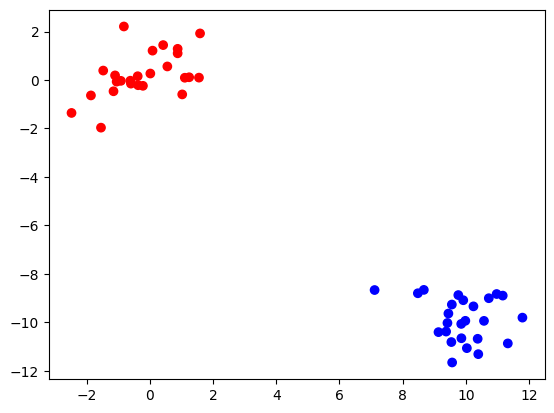

In [9]:
### Hierarchical clustering -------------------------------------------------------------------------------------

data2 = np.genfromtxt('data2.csv', delimiter=',')
print(data2)
color = ['blue' if i < len(data2)//2 else 'red' for i in range(len(data2))]
plt.scatter(data2[:,0], data2[:,1], c = color)

There are two clusters in the data.

In [10]:
# Inter Observational Distance ---------------------------------------------------------------------------------------

iod = []
#print((data2-data2[0,])**2)

for i in range(data2.shape[0]):
    #print(i)
    #sum = 0
    E_dist = ((data2 - data2[i,])**2)
    #print(E_dist)
    iod.append(np.sum(E_dist)**(1/2))
    
print(iod)
print(len(iod))

[73.92725721133912, 70.96849821797099, 79.30772578134805, 64.07618027428106, 68.80574213272938, 74.74544751252407, 60.27702030866923, 71.5145462504402, 74.39465797516962, 69.68015057671782, 72.561030950901, 72.56257723997092, 72.1638463108762, 81.03181335391724, 63.949296500682784, 78.01451547288687, 72.93195713893783, 77.00929713181607, 69.5213004923591, 79.25866643349877, 71.50685523925719, 74.80211622748858, 72.39436736656177, 76.68046107009198, 68.31455467393023, 77.4110007415718, 72.18724064458428, 73.3683125759446, 76.9135988351035, 72.64907088436735, 70.49821435690457, 73.79813743929482, 66.26928983730114, 67.42585785551486, 75.23670486792643, 75.90981238454906, 73.77693257469045, 67.12578032519066, 74.78288785650582, 74.69852490103777, 81.95524241910606, 71.30913147244603, 70.76794039001759, 71.1305047030923, 74.1999731194134, 71.41269313926125, 72.74731502761148, 71.97832823889432, 65.28677649720103, 72.41786142341418]
50


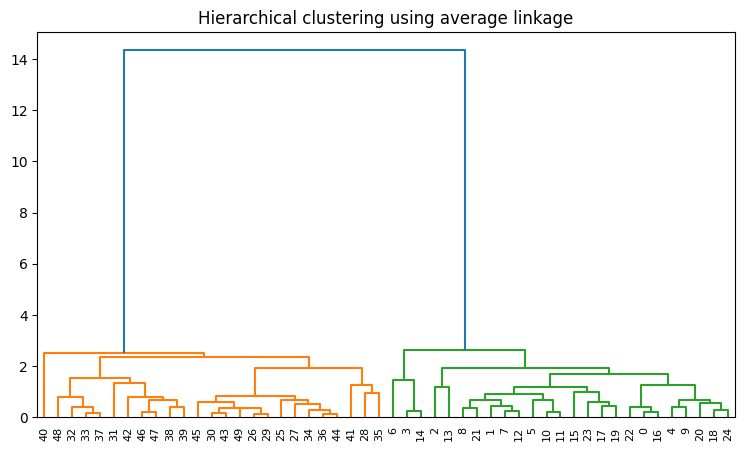

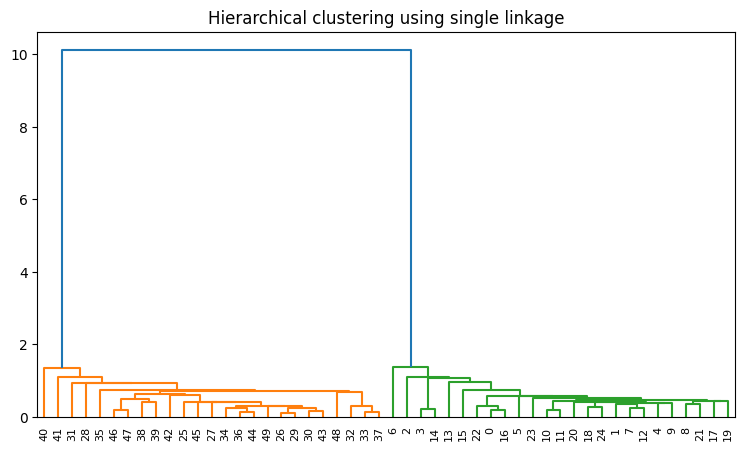

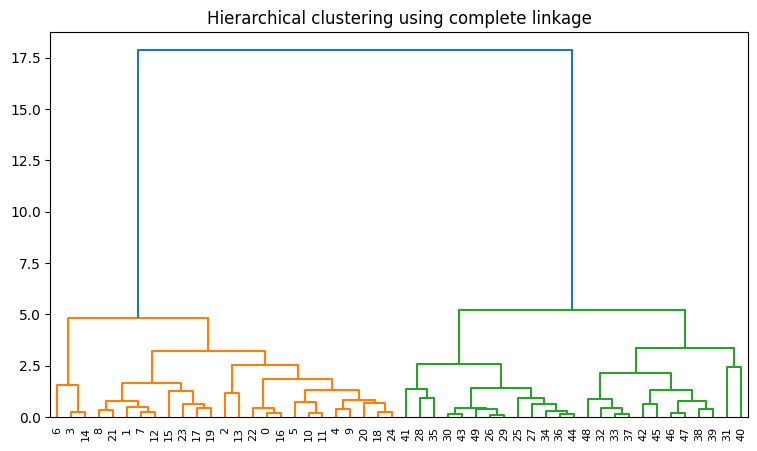

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

avrg = linkage(data2, 'average')
plt.figure(figsize = (9,5))
dg = dendrogram(avrg)
plt.title('Hierarchical clustering using average linkage')
plt.show()

single = linkage(data2, 'single')
plt.figure(figsize = (9,5))
dn = dendrogram(single)
plt.title('Hierarchical clustering using single linkage')
plt.show()


cmplt = linkage(data2, 'complete')
plt.figure(figsize = (9,5))
dn = dendrogram(cmplt)
plt.title('Hierarchical clustering using complete linkage')
plt.show()